# THE Spark Foundation -GRIP - Data Science and Business Analytics -July'2021

## Task 2 : Prediction Using Supervised ML
### Author : Prateek Verma
#### Dataset Used : It can be downloded through the following link -:  http://bit.ly/w-data

##### Predict the percentage of an student based on the no. of study hours.This is a simple linear regression task as it involves just 2 variables.

# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Downloding data set to pandas DataFrame

In [2]:
url='http://bit.ly/w-data'
df=pd.read_csv(url)

In [3]:
df.shape

(25, 2)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


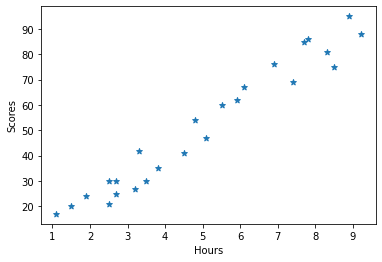

In [8]:
# The graph shows us the relationship between two variables is linear.
plt.scatter(df['Hours'],df['Scores'],marker='*')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [9]:
#correlation is usefull for getting the relationship between attributes.
#by default it will give the correlation by pearson method
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


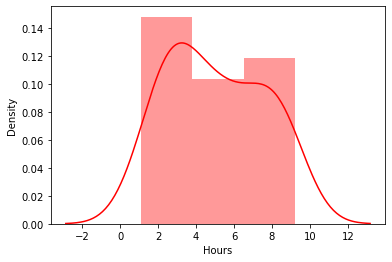

In [10]:
sb.distplot(df['Hours'],color='red');

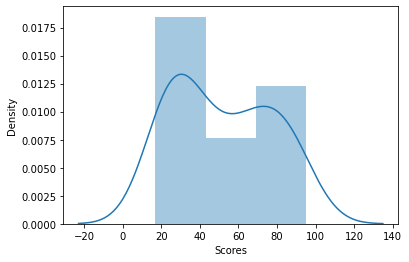

In [11]:
sb.distplot(df['Scores']);

# Preparing the data for the model.

In [12]:
#dividing the data into two parts-- Feature set and Labels
x=df.iloc[:,:-1].values #Feature set
y=df.iloc[:,1].values #Label

# Importing the Model from Scikit Learn

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
# dividing dataset into tarin and test dataset.
# 80% data is train dataset and 20% data set is test dataset.
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
algo=LinearRegression()

In [16]:
algo.fit(x_tr,y_tr)

LinearRegression()

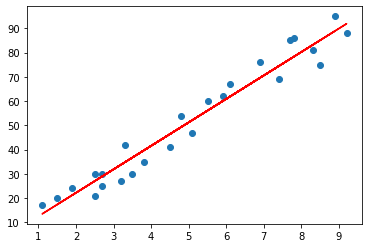

In [17]:
m=algo.coef_
c=algo.intercept_
Y=m*x+c
plt.scatter(x,y)
plt.plot(x,Y,color='red')
plt.show()

In [18]:
pred=algo.predict(x_ts)
pd.DataFrame({'ACTUAL_VALUE':y_ts,'PREDICTED_VALUE':pred})

,ACTUAL_VALUE,PREDICTED_VALUE
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


<AxesSubplot:ylabel='Density'>

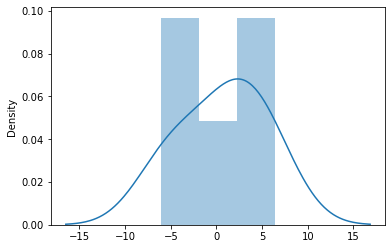

In [23]:

sb.distplot(y_ts-pred)

## Solving the Problem Statement --What will be predicted score if a student studies for 9.25 hrs/ day?

In [20]:
h=9.25
a=algo.predict([[h]])
print('if student studies for {} hours per day he/she is likely to score {}%'.format(h,*a))

if student studies for 9.25 hours per day he/she is likely to score 92.38611528261494%


# Accuracy  is 96%

In [24]:
from sklearn import metrics

In [25]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_ts,pred))
print('R2 Score:',metrics.r2_score(y_ts,pred))

Mean Absolute Error: 3.9207511902099244
R2 Score: 0.9678055545167994
